In [73]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from ggplot import *


### Custom
import nltk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [33]:
df = pd.read_csv('../data/train_sample.csv')
# df = pd.read_csv('../data/train.csv')

# Feature explore

In [97]:
### Util Functions
def tokenize_string(string):
    string = str(string)
    return string.lower()

### Feature functions
def match_search_term_to_title(row):
    """
    Is the search term in the product title?
    """
    searh_term = tokenize_string(row['search_term'])
    prod_title = tokenize_string(row['product_title'])
    
    return prod_title.find(searh_term) != - 1

def match_search_term_to_description(row):
    """
    Is the search term in the product desc?
    """
    searh_term = tokenize_string(row['search_term'])
    prod_desc = tokenize_string(row['product_description'])
    
    return prod_desc.find(searh_term) != - 1

def count_description(row):
    """
    Length of description
    """
    return len(tokenize_string(row['product_description']).split(' '))

def count_description(row):
    """
    Length of description
    """
    return len(tokenize_string(row['product_description']).split(' '))

def count_search_description_occurences(row):
    """
    Sum of times search term appears in the description
    """
    search_term = tokenize_string(row['search_term'])
    prod_desc = tokenize_string(row['product_description'])
    sums = 0
    for t in search_term.split(' '):
        sums += prod_desc.count(t)
    return sums

def match_search_description_occurences(row):
    """
    Number of times search term matches in the description (boolean count)
    """
    search_term = tokenize_string(row['search_term'])
    prod_desc = tokenize_string(row['product_description'])
    sums = 0
    for t in search_term.split(' '):
        sums += search_term.find(t) != -1
    return sums

In [98]:
df_feats = pd.DataFrame()
df_feats['match_search'] = df.apply(match_search_term_to_title,axis=1)
df_feats['match_desc'] = df.apply(match_search_term_to_description,axis=1)
df_feats['desc_count'] = df.apply(count_description,axis=1)
df_feats['search_desc_count'] = df.apply(count_search_description_occurences,axis=1)
df_feats['search_desc_match'] = df.apply(match_search_description_occurences,axis=1)
df_feats['relevance'] = df['relevance']

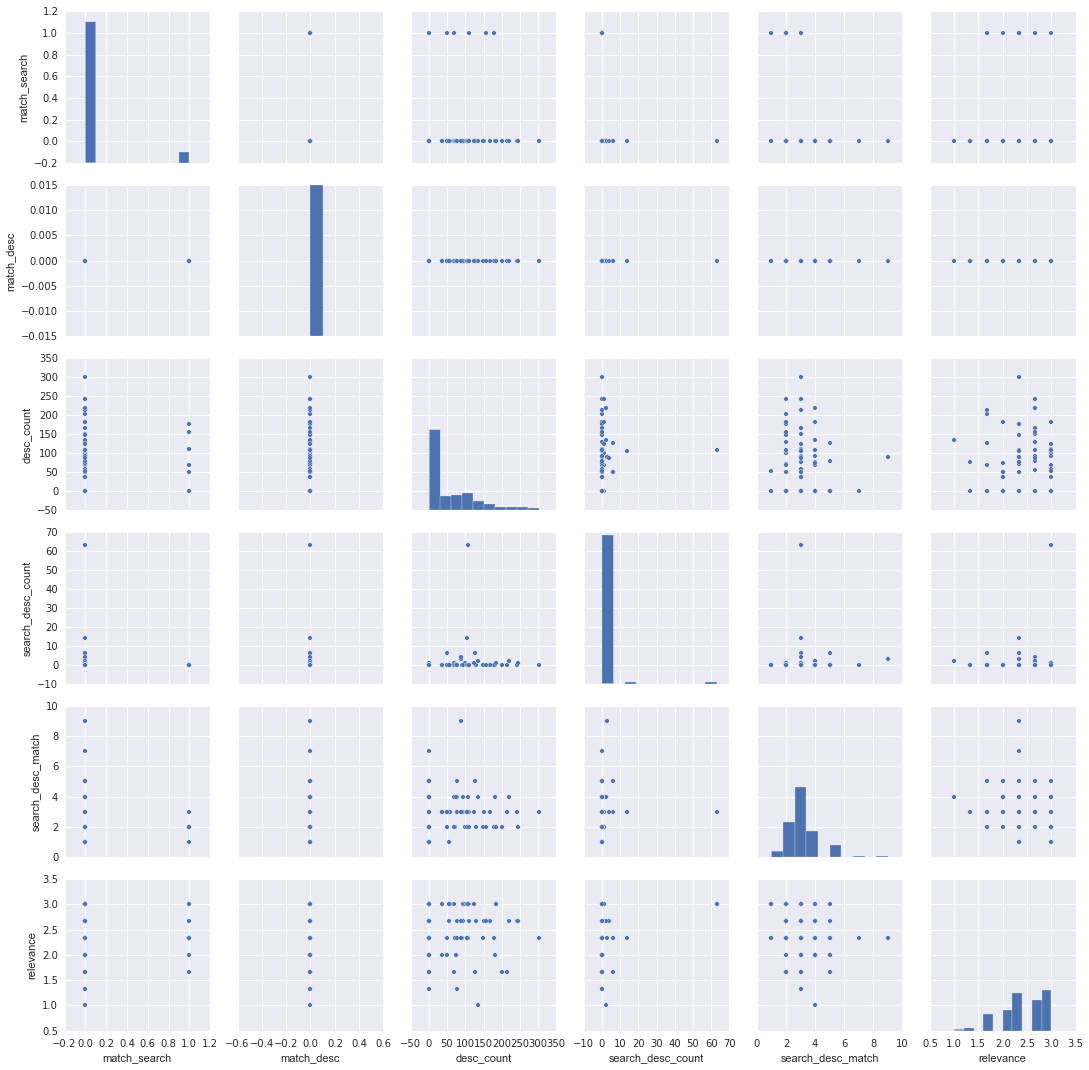

In [99]:
sns.pairplot(df_feats)